In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../../')
import experiments

curves = 9
curve_labels = ['k=0.25 1/4x','k=0.25 1x', 'k=0.25 4x', 'k=1 1/4x', 'k=1 1x', 'k=1 4x',  
                'k=4 1/4x','k=4 1x', 'k=4 4x',]
curve_colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'limegreen', 'darkgreen', 'peachpuff', 'orange', 'darkorange']
curve_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-']
layers = 4
layer_labels = [1, 2, 3, 4]
crosses = 3

results = np.zeros((curves, layers, 2))
results_test = np.zeros((curves, layers, 2))
# both are indexed [network][layer][avg/std]
# we have to make sure to not be sketchy and state that these are averages within a net instead of between nets

included_nets = [217, 219, 223, 225, 229, 231, 234, 236, 238]

for ID in included_nets:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0
    if opt.hyper.lr_bs_factor == 1:
        curve_idx += 3
    if opt.hyper.lr_bs_factor == 4:
        curve_idx += 6
    if opt.dnn.neuron_multiplier[0] == 1:
        curve_idx += 1
    elif opt.dnn.neuron_multiplier[0] == 4:
        curve_idx += 2

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
    df = pd.read_csv(csv_file)

    similarity_ave = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == str(j)]
                                 ['similarity_ave'].iloc[0] for j in range(layers)] for i in range(crosses)])
    similarity_std = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == str(j)]
                                 ['similarity_std'].iloc[0] for j in range(layers)] for i in range(crosses)])
    similarity_ave_test = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'test']
                                      [df['layer'] == str(j)]['similarity_ave'].iloc[0] for j in range(layers)]
                                     for i in range(crosses)])
    similarity_std_test = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'test']
                                      [df['layer'] == str(j)]['similarity_std'].iloc[0] for j in range(layers)]
                                     for i in range(crosses)])

    results[curve_idx, :, 0] = np.mean(similarity_ave, axis=0)
    results[curve_idx, :, 1] = np.mean(similarity_std, axis=0)
    results_test[curve_idx, :, 0] = np.mean(similarity_ave_test, axis=0)
    results_test[curve_idx, :, 1] = np.mean(similarity_std_test, axis=0)
    
    if curve_idx==5:
        print(similarity_ave)
        print(similarity_std)


Processing ID: 217
Processing ID: 219
Processing ID: 223
Processing ID: 225
Processing ID: 229
[[ 13.078125    1.15625     0.34375    11.34375  ]
 [ 13.140625    1.15625     0.34375    11.4375   ]
 [ 13.203125    1.1875      0.328125   11.3046875]]
[[ 11.59647668   1.49183978   0.76482739   6.17193434]
 [ 11.46307549   1.49183978   0.76482739   6.12723174]
 [ 11.56662722   1.4776988    0.76146831   6.09694928]]
Processing ID: 231
Processing ID: 234
Processing ID: 236
Processing ID: 238


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


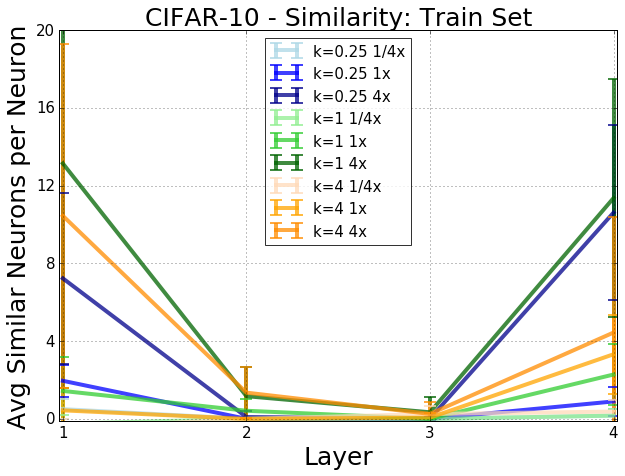

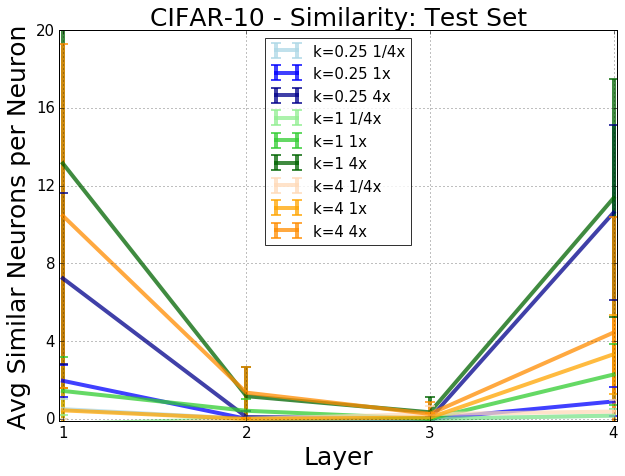

In [5]:
# first plot train curves

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Similarity: Train Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('Avg Similar Neurons per Neuron', fontsize=25)
plt.xlim((0.98, layers+0.02))
plt.ylim((-0.1, 20))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([i for i in range(0, 21, 4)], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results[curve_idx, :, 0], yerr=results[curve_idx, :, 1].T,
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], 
                 linewidth=4, capsize=6, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper center', framealpha=0.8, fontsize=15)

plt.show()

# second plot test curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Similarity: Test Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('Avg Similar Neurons per Neuron', fontsize=25)
plt.xlim((0.98, layers+0.02))
plt.ylim((-0.1, 20))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([i for i in range(0, 21, 4)], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results[curve_idx, :, 0], yerr=results[curve_idx, :, 1].T,
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], 
                 linewidth=4, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper center', framealpha=0.8, fontsize=15)

plt.show()
